# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1619293603325_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)

In [2]:
sc.list_packages() 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.3.1
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0.3
pip                        21.1
py-dateutil                2.2
pyparsing                  2.4.7
python-dateutil            2.8.1
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
scipy                      1.5.4
seaborn                    0.10.0
setuptools                 56.0.0
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.36.2
windmill                   1.6

## Importing

Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [4]:
df_business = spark.read.json('s3://sta-9760-spark-datasets/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

Display the number of rows and columns in our dataset.

In [5]:
print('columns:', len(df_business.columns),'| Rows:',df_business.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

columns: 14 | Rows: 160585

Display the DataFrame schema below.

In [6]:
df_business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [7]:
df_business.select("business_id","name","city","state","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [8]:
categories = df_business.select('categories').collect()
businessid = df_business.select('business_id').collect()

catlist = []
buslist = []

for cat,bus in zip(categories,businessid):
    cat = str(cat)
    cat = cat[16:-2]
    word = cat.split(",")
    for w in word:
        catlist.append(w)
        buslist.append(bus)
        
df_cat = sqlContext.createDataFrame(zip(buslist,catlist ), schema=['business_id','categories'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [9]:
df_cat.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|         business_id|   categories|
+--------------------+-------------+
|[6iYb2HFDywm3zjuR...|   Gastropubs|
|[6iYb2HFDywm3zjuR...|         Food|
|[6iYb2HFDywm3zjuR...| Beer Gardens|
|[6iYb2HFDywm3zjuR...|  Restaurants|
|[6iYb2HFDywm3zjuR...|         Bars|
+--------------------+-------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [10]:
df_cat.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2488

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [11]:
df_cat.groupBy('categories').count().orderBy("count", ascending=False).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|36340|
|                Food|22094|
|            Shopping|20056|
|         Restaurants|14423|
|       Home Services|12001|
|       Beauty & Spas|11633|
|    Health & Medical|11390|
|           Nightlife| 9808|
|      Local Services| 9299|
|                Bars| 8914|
| Event Planning &...| 7617|
|                Food| 7375|
|         Active Life| 7039|
|          Automotive| 6785|
|            Shopping| 6149|
|        Coffee & Tea| 5735|
|          Sandwiches| 5697|
| American (Tradit...| 5235|
|             Fashion| 5231|
|       Beauty & Spas| 4941|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

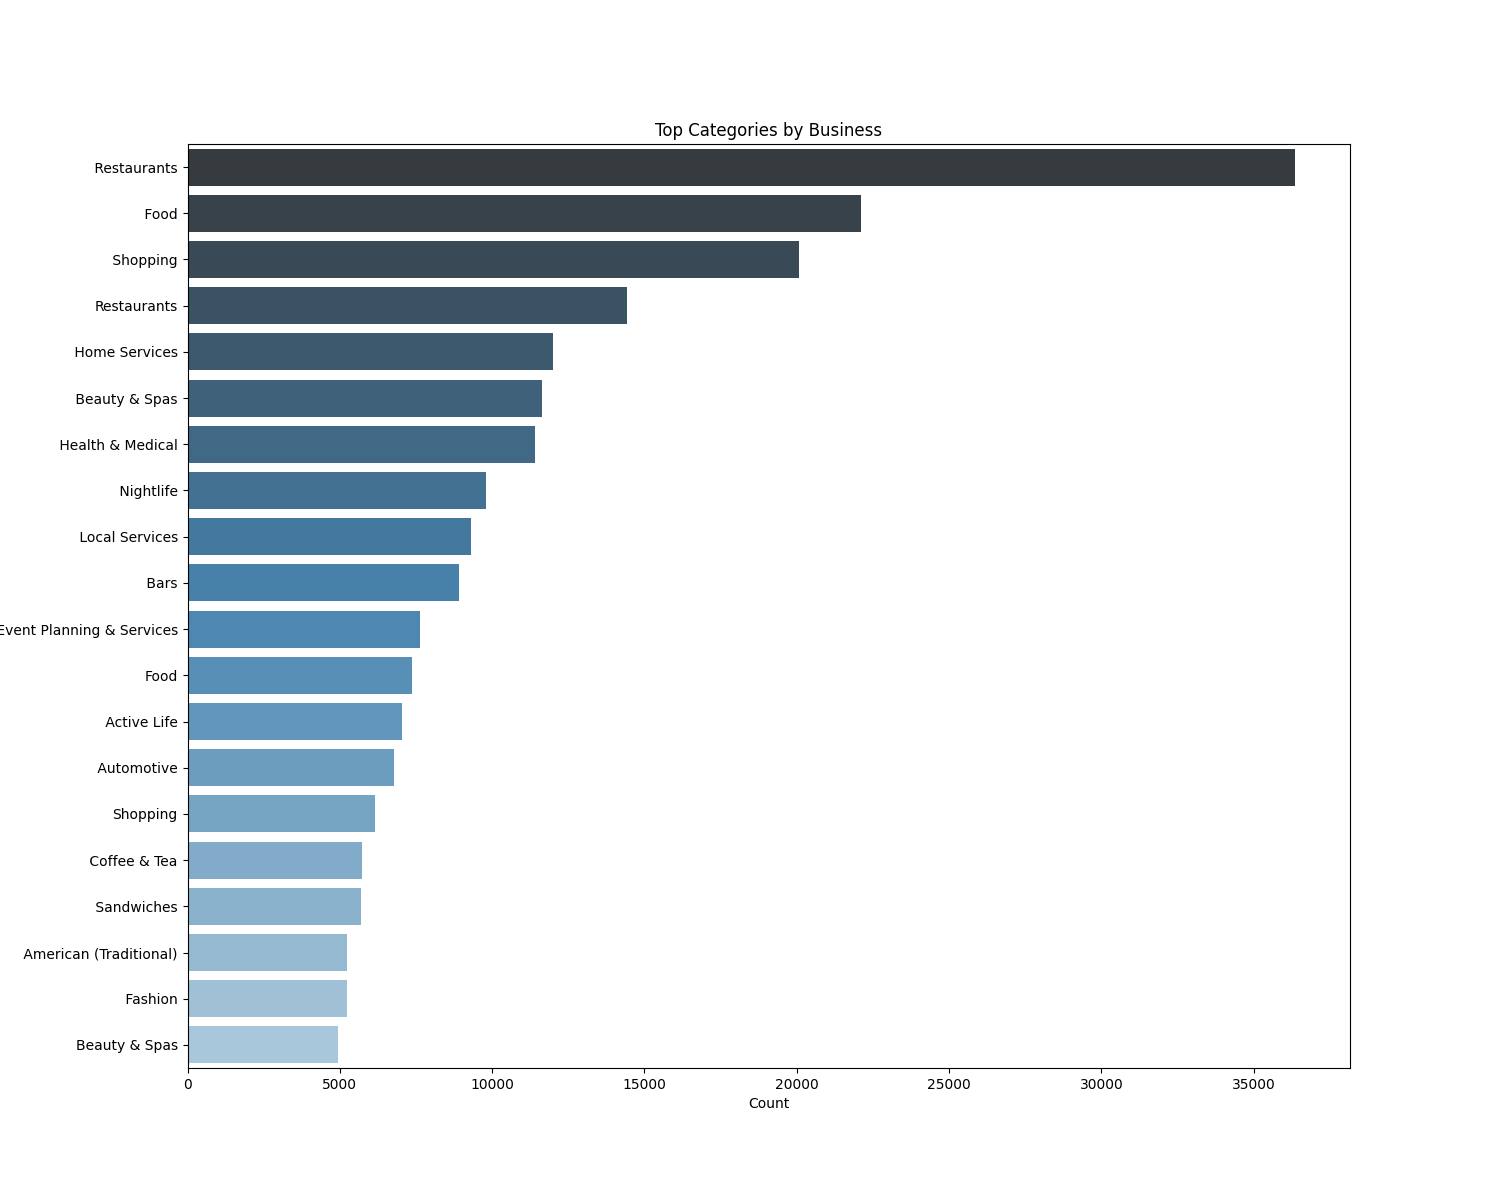

In [12]:
df_top_cat = df_cat.groupBy('categories').count().orderBy("count", ascending=False).toPandas()
df_top_cat = pd.DataFrame(df_top_cat.head(20))

plt.figure(figsize=(15, 12))
sns.barplot(x="count", y="categories", data=df_top_cat, palette="Blues_d")

plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Top Categories by Business')

%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [13]:
df_review = spark.read.json('s3://sta-9760-spark-datasets/yelp_academic_dataset_review.json')
df_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [14]:
df_review.select("business_id","stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [15]:
avg_star = df_review.groupBy("business_id").avg("stars")
df_review = df_review.join(avg_star, on=['business_id'], how='inner')
avg_star.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|Agq4zoNLSIpT1_ZJb...| 4.388571428571429|
|3ZVgig7uux9jVtEZn...| 4.019120458891013|
|HXYJIJ7lDhOUjaOvj...| 4.743589743589744|
|uSHEuUnh9d4kabRfs...| 3.686900958466454|
|8oz6JU_1D8PaLDNvq...|4.6521739130434785|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [16]:
df_business = df_business.withColumnRenamed("stars","actual_star")
df_joined = df_business.join(df_review, on=['business_id'], how='inner')
df_joined.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nul

Let's see a few of these:

In [17]:
df_joined.select("avg(stars)","stars","name","city","state").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+-------+---------+-----+
|        avg(stars)|stars|   name|     city|state|
+------------------+-----+-------+---------+-----+
|1.9090909090909092|  2.0|Safeway|Vancouver|   WA|
|1.9090909090909092|  5.0|Safeway|Vancouver|   WA|
|1.9090909090909092|  5.0|Safeway|Vancouver|   WA|
|1.9090909090909092|  1.0|Safeway|Vancouver|   WA|
|1.9090909090909092|  1.0|Safeway|Vancouver|   WA|
+------------------+-----+-------+---------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [18]:
from pyspark.sql.functions import col

df_join_avg = df_joined.withColumn("skew", (col('avg(stars)') - col('stars')) / col('stars'))
df_skew = df_join_avg.select("business_id","skew").toPandas()
df_skew.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              business_id      skew
0  -36nnCT71XE0InJXKBIpuw  0.909091
1  -36nnCT71XE0InJXKBIpuw -0.618182
2  -36nnCT71XE0InJXKBIpuw  0.909091
3  -36nnCT71XE0InJXKBIpuw  0.909091
4  -36nnCT71XE0InJXKBIpuw -0.045455

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

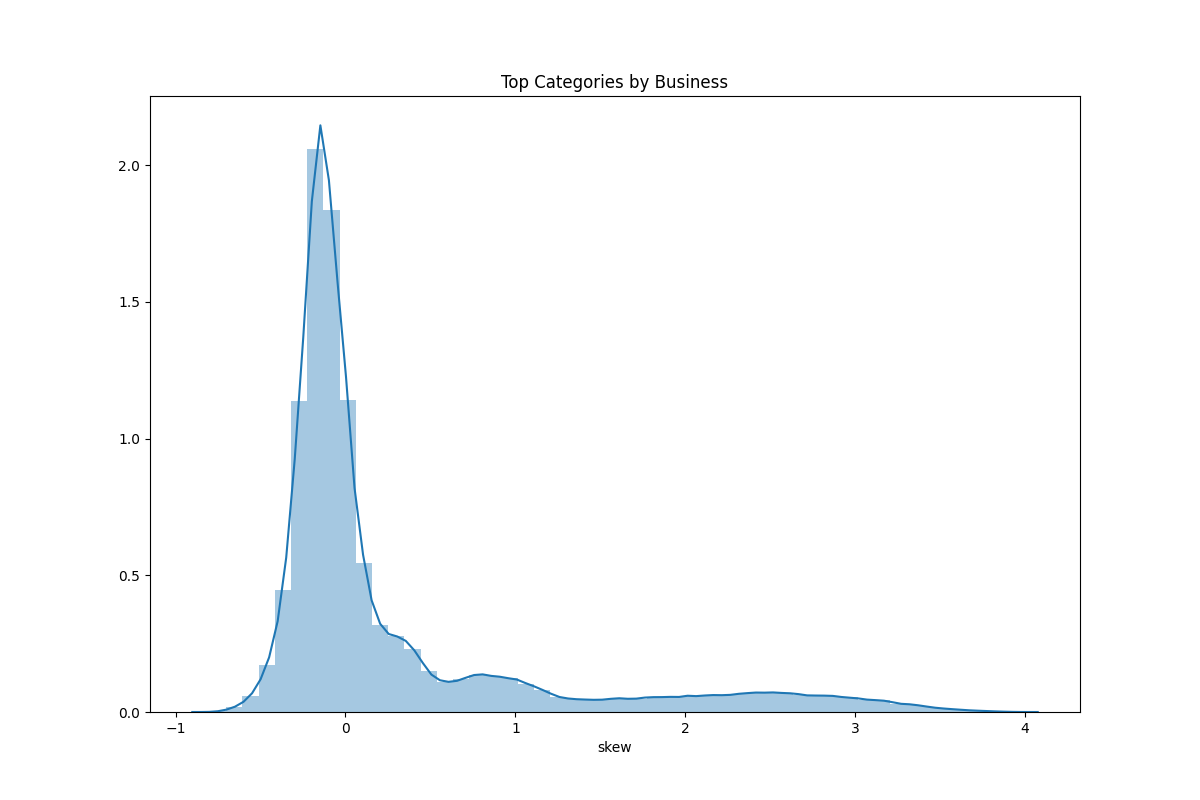

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(df_skew['skew'])

plt.title('Top Categories by Business')

%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

## Answer:


From the figure shows above, we can see that the reviews sightly skewed to the right. It's a positive skewness. We can notice that the written review from users is generally higher than average from this finding.

# Did Influencer really influence the rating of restaurants?

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [20]:
df_user = spark.read.json('s3://sta-9760-spark-datasets/yelp_academic_dataset_user.json')
df_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

- Explore some of the columns in this dataset.

In [21]:
df_user.select('average_stars','elite','fans','review_count','useful','yelping_since').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+--------------------+----+------------+------+-------------------+
|average_stars|               elite|fans|review_count|useful|      yelping_since|
+-------------+--------------------+----+------------+------+-------------------+
|         3.85|2006,2007,2008,20...|1357|        1220| 15038|2005-03-14 20:26:35|
|         4.09|2007,2008,2009,20...|1025|        2136| 21272|2007-08-10 19:01:51|
|         3.76|           2010,2011|  16|         119|   188|2007-02-07 15:47:53|
|         3.77|2009,2010,2011,20...| 420|         987|  7234|2009-02-09 16:14:29|
|         3.72|      2009,2010,2011|  47|         495|  1577|2008-03-03 04:57:05|
+-------------+--------------------+----+------------+------+-------------------+
only showing top 5 rows

In [22]:
df_user.select('compliment_cool','compliment_cute','compliment_funny','compliment_hot').show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------------+----------------+--------------+
|compliment_cool|compliment_cute|compliment_funny|compliment_hot|
+---------------+---------------+----------------+--------------+
|           2541|            361|            2541|          1710|
|           2205|            232|            2205|          1632|
|             31|              0|              31|            22|
|           1566|            219|            1566|          1180|
|            310|             16|             310|           248|
+---------------+---------------+----------------+--------------+
only showing top 5 rows

## Join the User and Review Dataset

- Combine the user dataset with the joined business and review dataset in previous section.

In [23]:
df_user_join = df_joined.join(df_user, on=['user_id'], how='inner')
df_user_join.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable =

- Create a new dataframe to only contained related entities and fliter by users who have number of fans more than 1000. 

In [24]:
top_user = df_user_join.select('business_id','user_id','stars','actual_star','fans').filter(df_user_join.fans > 1000)
top_user.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+-----------+----+
|         business_id|             user_id|stars|actual_star|fans|
+--------------------+--------------------+-----+-----------+----+
|lW2hcP2_cKOYES_4S...|aIJ-2R1q5G7oqzBSg...|  4.0|        3.5|1142|
|EmIpleattjVwdqncg...|aIJ-2R1q5G7oqzBSg...|  4.0|        3.5|1142|
|8VfNmpgQsGci0v89K...|aIJ-2R1q5G7oqzBSg...|  5.0|        4.5|1142|
|uAdVoIKCNyFelMAc5...|aIJ-2R1q5G7oqzBSg...|  5.0|        4.5|1142|
|leU9-Kd1HdcICWHlm...|aIJ-2R1q5G7oqzBSg...|  5.0|        4.0|1142|
+--------------------+--------------------+-----+-----------+----+
only showing top 5 rows

- Createa box plot to see the correlation between the actual rating and the influencer's rating.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

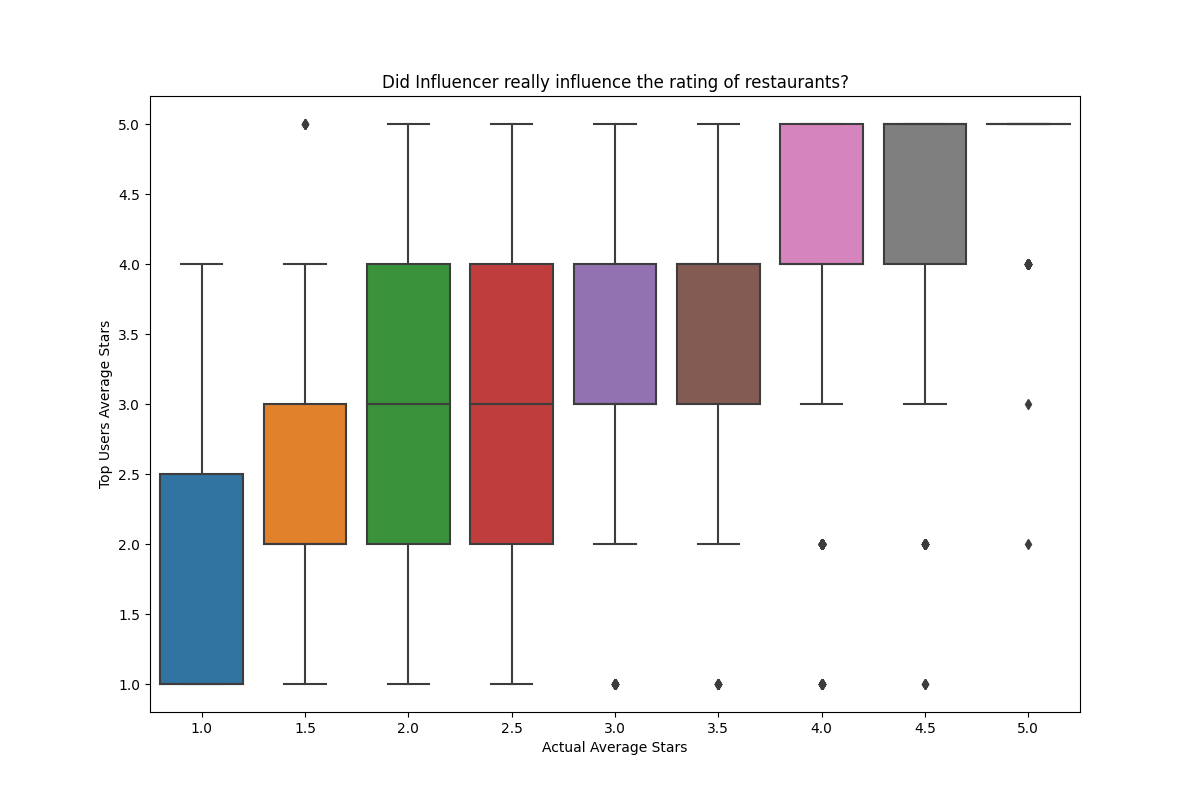

In [25]:
pd_top_user = top_user.toPandas()

plt.figure(figsize=(12, 8))
sns.boxplot(data=pd_top_user, x="actual_star", y="stars")
plt.ylabel('Top Users Average Stars')
plt.xlabel('Actual Average Stars')
plt.title('Did Influencer really influence the rating of restaurants?')

%matplot plt

# Findings

- From this result, we can see that influencers are genrally giving higher rating than the actual restaurant's rating. For instances, when the restaurant actual rating was 2.0, the mean of influencer's rating was 3.0. Only 25% of influencer's rating was matching the actual rating. From this findings, we can observed that influencers on Yelp may not be influencing the actual rating.